# SPRING FLOD ANALYSIS

1. Click box below and choose sheet in excel that you want to do an analysis for.
2. Click on Cell -> Run All

In [2]:
#Choosing LTM model
# Norg, Sver, LTM1,..LTM8, LTMS
sheet = 'Norg'

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [4]:
import sys

path = '\\\\energycorp\\applications\\OSL\\jupyter_notebooks\\personalfolders\\u39545_Sarah\\EtteranalyseLTM'
sys.path.insert(0, path)

import modules as m

%load_ext autoreload
%autoreload 2

print('\n------------------------------------------------------------------------------------------------------\n')
print('                                                  {}                                                '.format(sheet))
print('\n------------------------------------------------------------------------------------------------------\n')
file = r'spring_flod_analysis_manual_added.xlsx'

#Reading comments etc from Excel file: 'Etteranalyse_snow_LTM.xlsx'
all_keys, vhhQ_OBSE_list, comments_list, excluded_list, start_list, end_list = m.read_excel(sheet, file)
print(all_keys[:][:])
    
#Reading in all keys from SMG
all_df = m.read_from_SMG(all_keys, vhhQ_OBSE_list, sheet)

#Making new df for all models for analyis period
df_analysis_period, start_info_list, end_info_list = m.df_analysis_period(all_df, start_list, end_list, sheet)

#Excluding columns that are chosen to be excluded in the Excel document
df_for_analysis, keys_for_analysis = m.exclude_keys(df_analysis_period, all_keys, excluded_list)

#Calculating performance of the models
acc_perf_all, R2_perf_all = m.calc_performance(df_for_analysis, keys_for_analysis)
if sheet == 'Norg':
    acc_perf = acc_perf_all.drop('Norge')
elif sheet == 'Sver':
    acc_perf = acc_perf_all.drop('Sverige')
else:
    acc_perf = acc_perf_all
    



------------------------------------------------------------------------------------------------------

                                                  Norg                                                

------------------------------------------------------------------------------------------------------

['Norge' 'Reg1' 'Reg2' 'Reg3' 'Reg4' 'Reg5' 'Reg6' 'Reg7' 'Reg8']



## BOX AND WHISKER PLOT ACCUMULATIVE DEVIATION FROM Q_OBSE

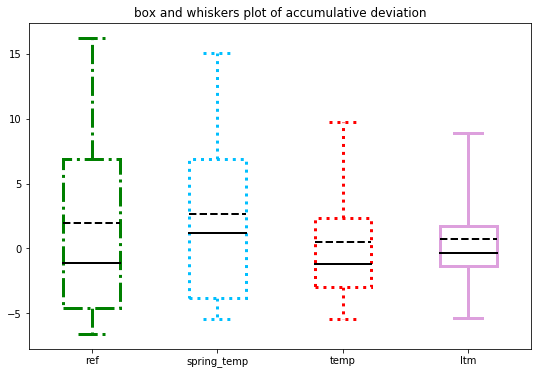

In [5]:
m.box_plot(acc_perf)

# Performance According to Accumulated Deviation from Q_OBSE
## ADJUSTMENTS: BETTER or WORSE

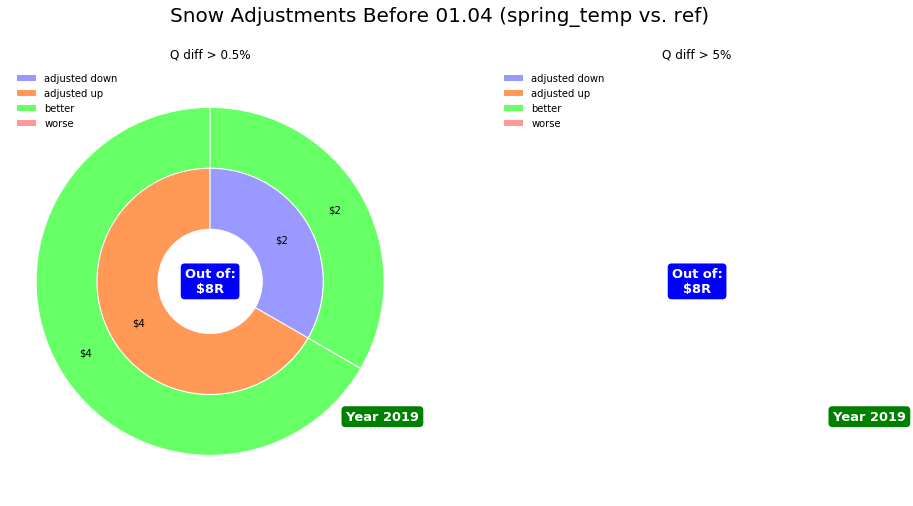

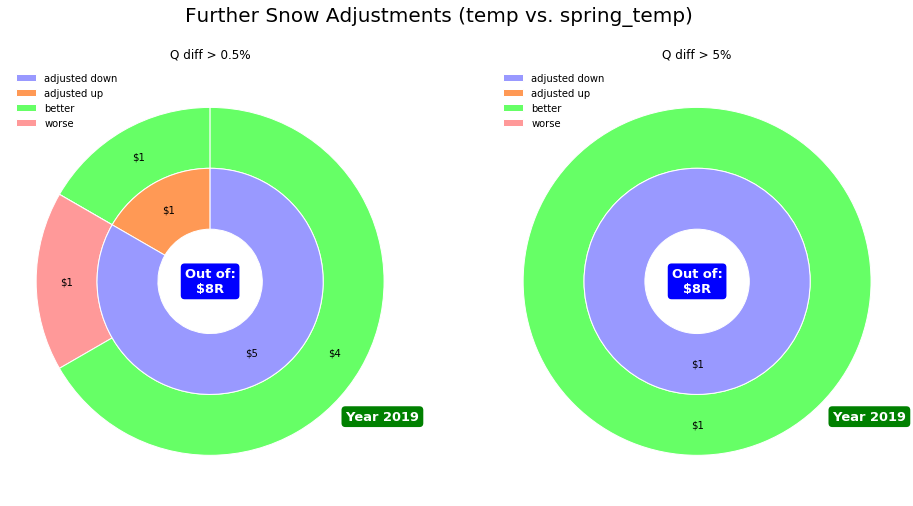

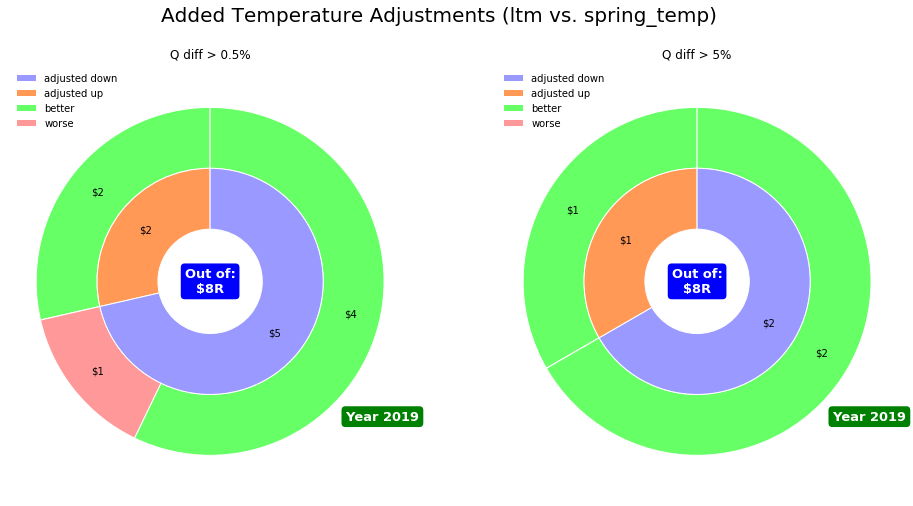

In [6]:
# Macke pie plot with performance for adjusted models
m.pie_subplot_perf(acc_perf, sheet, 'ref', 'spring_temp')
m.pie_subplot_perf(acc_perf, sheet, 'spring_temp', 'temp')
m.pie_subplot_perf(acc_perf, sheet, 'spring_temp', 'ltm')
#m.pie_subplot_perf(acc_perf_df, ltm, what='snow')


# Performance According to Accumulated Inflow [%] Error and Inflow Profile Correlation (R2) 

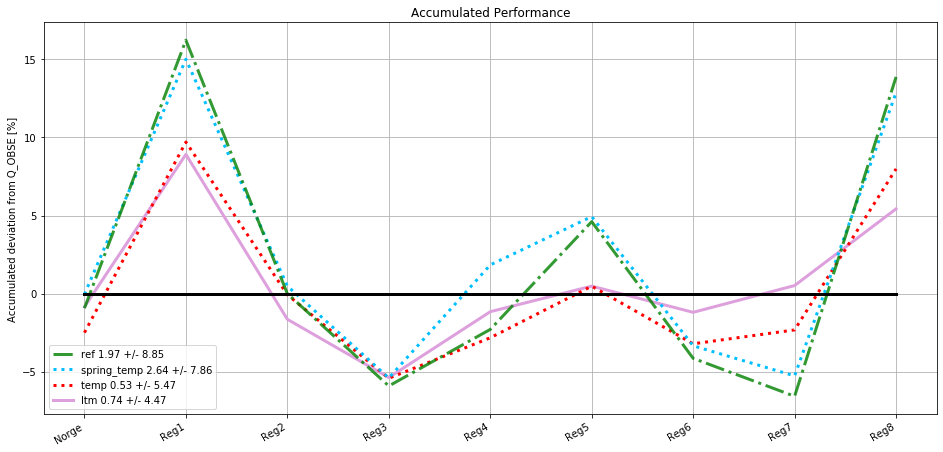

In [7]:
#plot performance for models in the LTM model
m.plot_perf_models(acc_perf_all, sheet, perfType='Accumulated')


# Induvidual Analysis for Each Model

{'u09': 'aquamarine', 'u10': 'moccasin', 'u12': 'pink', 'u16': 'powderblue', 'u22': 'palegreen', 'u24': 'violet', 'u25': 'coral', 'u26': 'khaki'}



------------------------------------------------------------------------------------------------------------------------
                                                        Norge
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-04-01): read from excel.
Analysis end (2019-07-26): First day when the inflow models are close to Q_OBSE, one week after the snow magasine goes under 20 GWh SWE.

Accumulated performance [percentage deviation]: ref: -0.94, spring_temp: -0.05, temp: -2.51, ltm: -0.86
Profile correlation performance [R2 value]: ref: 0.95, spring_temp: 0.96, temp: 0.95, ltm: 0.98


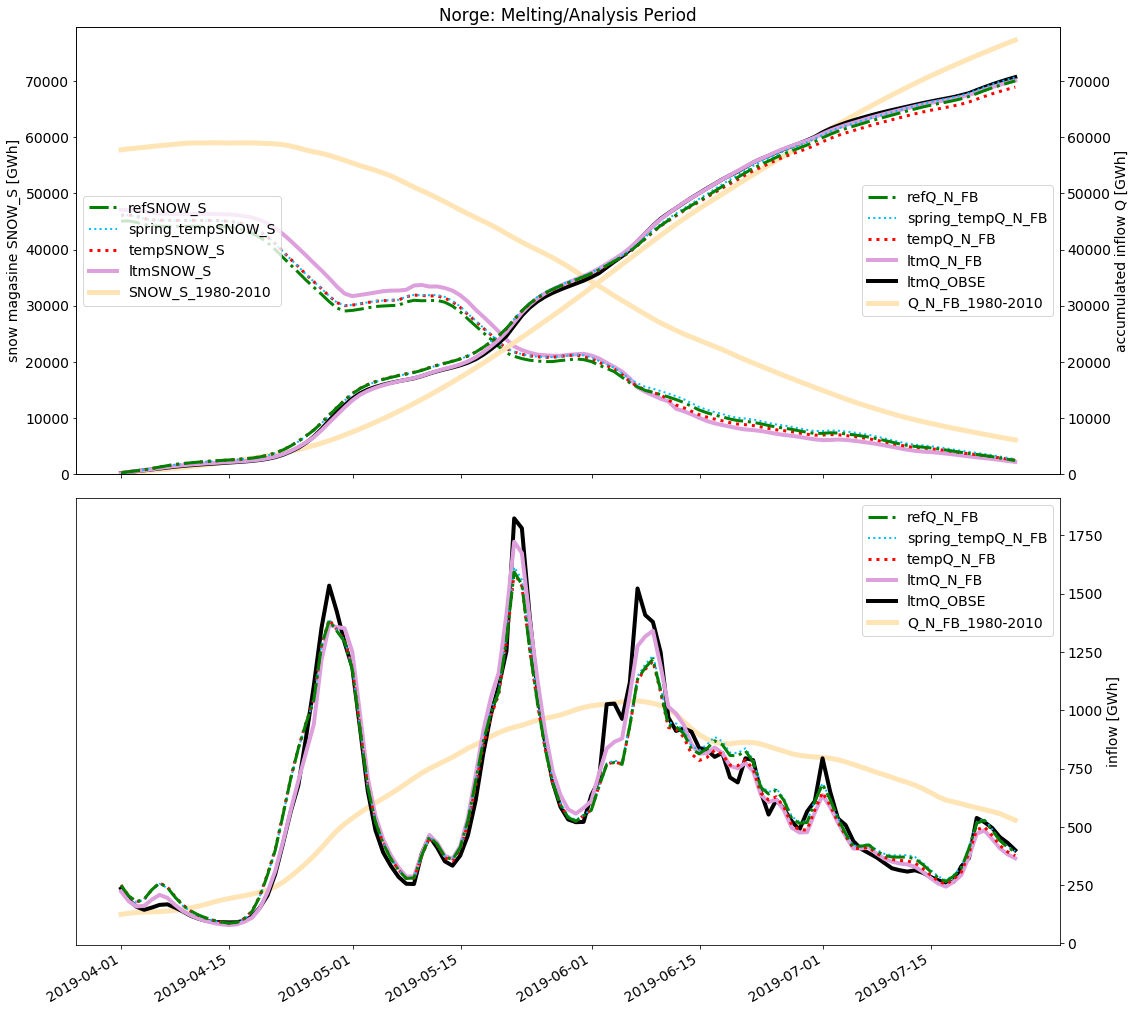

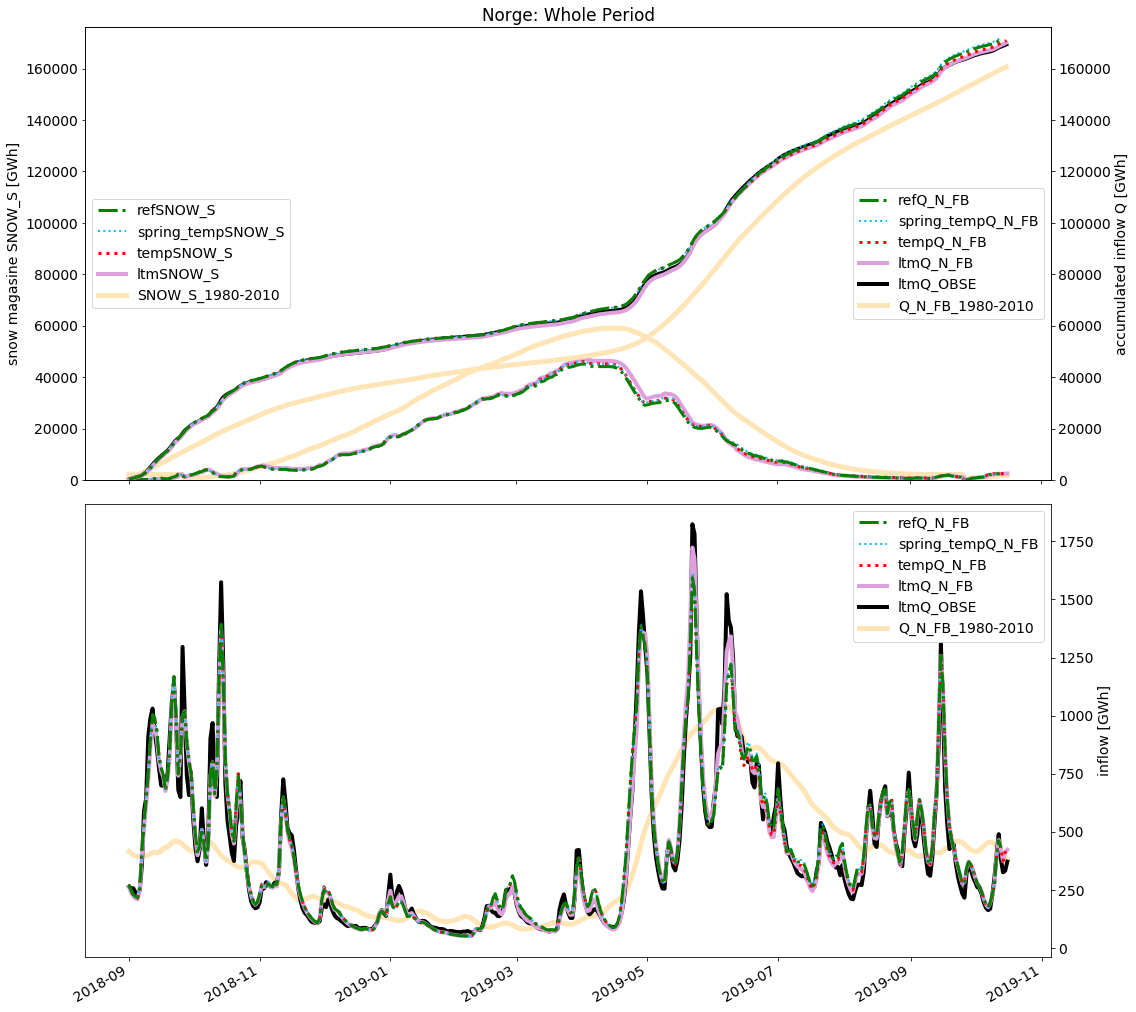




------------------------------------------------------------------------------------------------------------------------
                                                        Reg1
------------------------------------------------------------------------------------------------------------------------
Analysis start (2018-12-30): Day befor spring snow adjustment.
Analysis end (2019-08-17): First day when the inflow models are close to Q_OBSE, one week after the snow magasine goes under 20 GWh SWE.

Models updated in explicit weeek:
u09: ['Sælatun-002.284']
u22: ['Nybergs-311.006']
u24: ['Etna-012.007']
u25: ['Liavatn-002.275', 'Nore.1-015.011', 'Sjodals-002.013', 'Sælatun-002.284']

Accumulated performance [percentage deviation]: ref: 16.24, spring_temp: 15.02, temp: 9.71, ltm: 8.92
Profile correlation performance [R2 value]: ref: 0.93, spring_temp: 0.93, temp: 0.96, ltm: 0.96


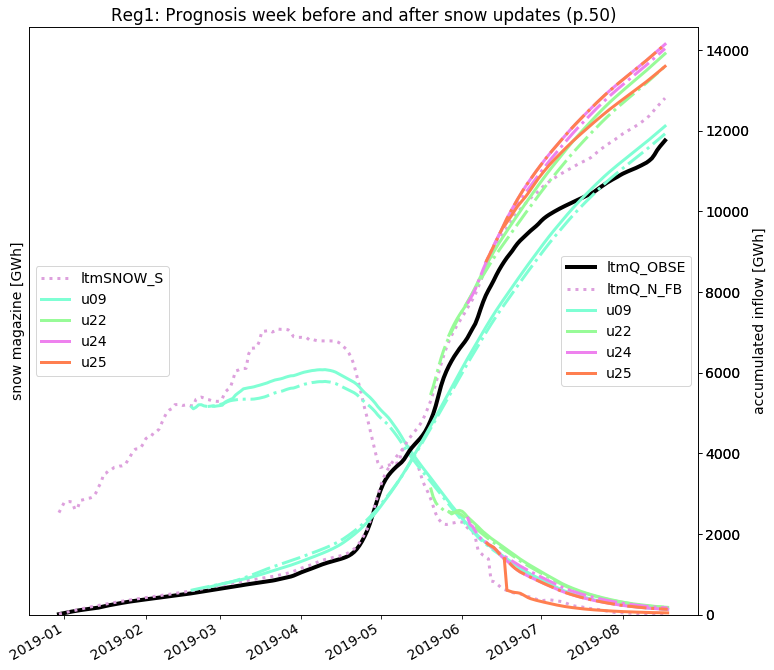

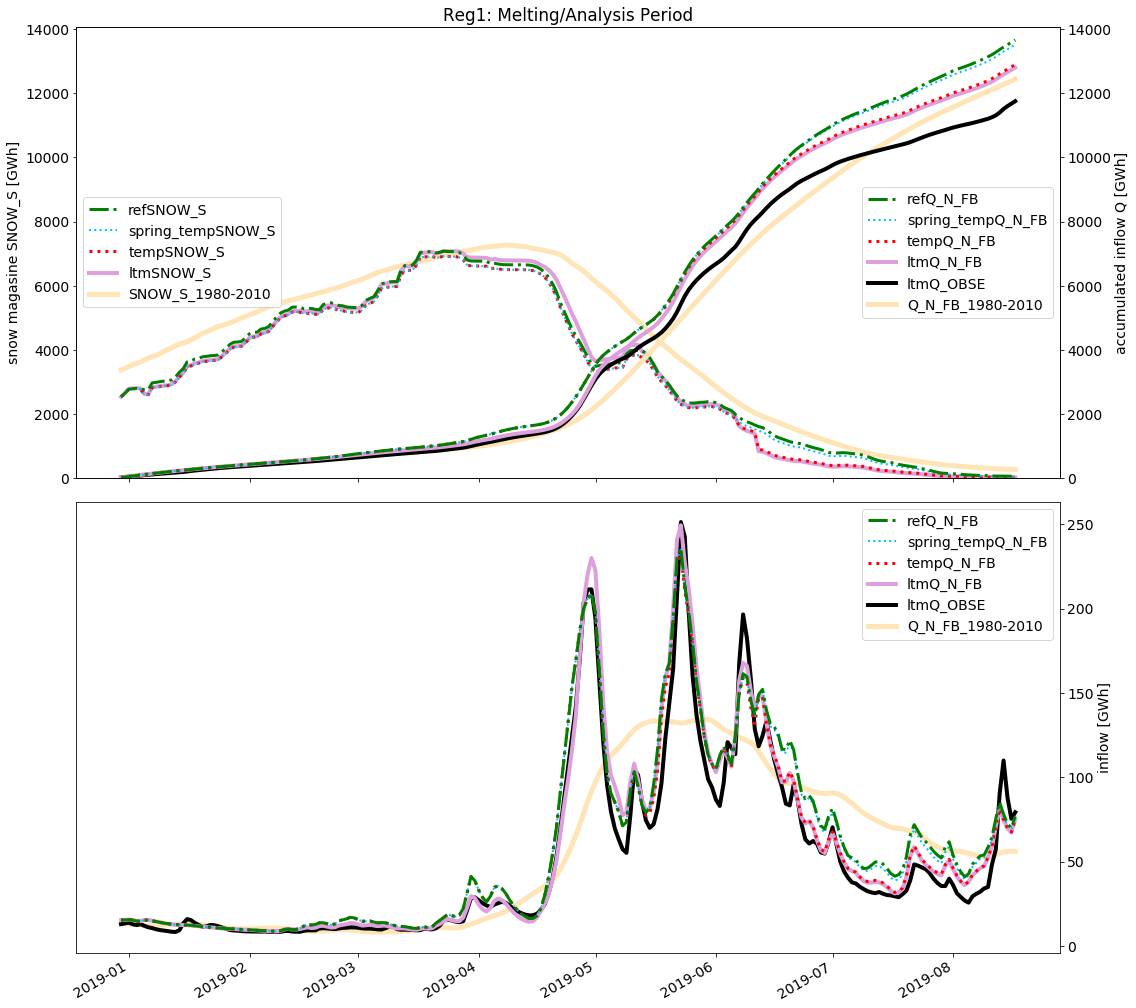

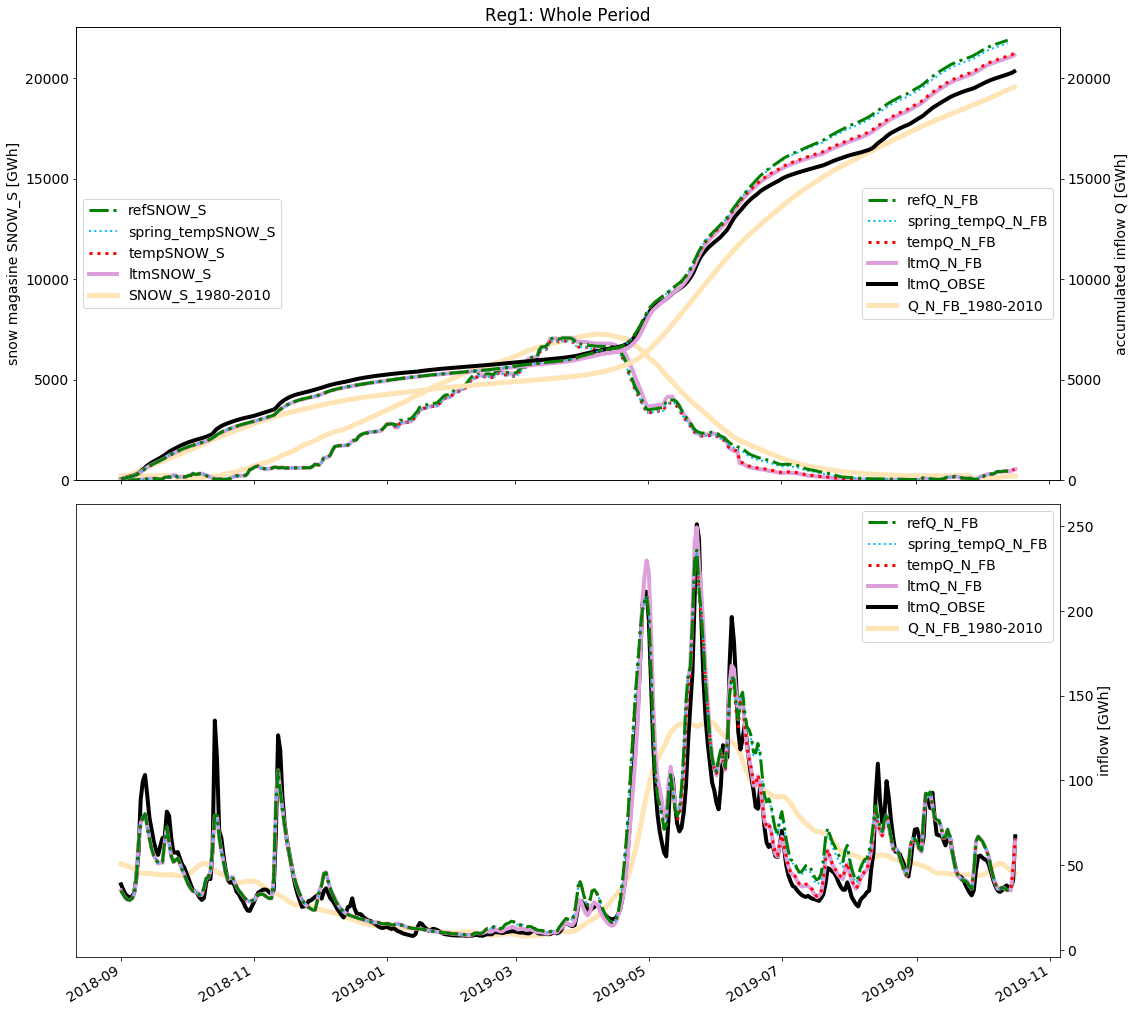




------------------------------------------------------------------------------------------------------------------------
                                                        Reg2
------------------------------------------------------------------------------------------------------------------------
Analysis start (2018-09-12): Day befor spring snow adjustment.
Analysis end (2019-07-01): First day when the inflow models are close to Q_OBSE, one week after the snow magasine goes under 20 GWh SWE.

Models updated in explicit weeek:
u10: ['Saurdal-036.048']
u12: ['Mår....-016.198', 'Saurdal_Bykle', 'Songa..-016.185', 'Songa_Møsvatn']
u16: ['Jogla-026.026', 'Roskrep-025.029', 'Tingvat-024.009']
u24: ['Tysso-2-049.002']

Accumulated performance [percentage deviation]: ref: -0.01, spring_temp: 0.48, temp: -0.08, ltm: -1.65
Profile correlation performance [R2 value]: ref: 0.93, spring_temp: 0.94, temp: 0.94, ltm: 0.95


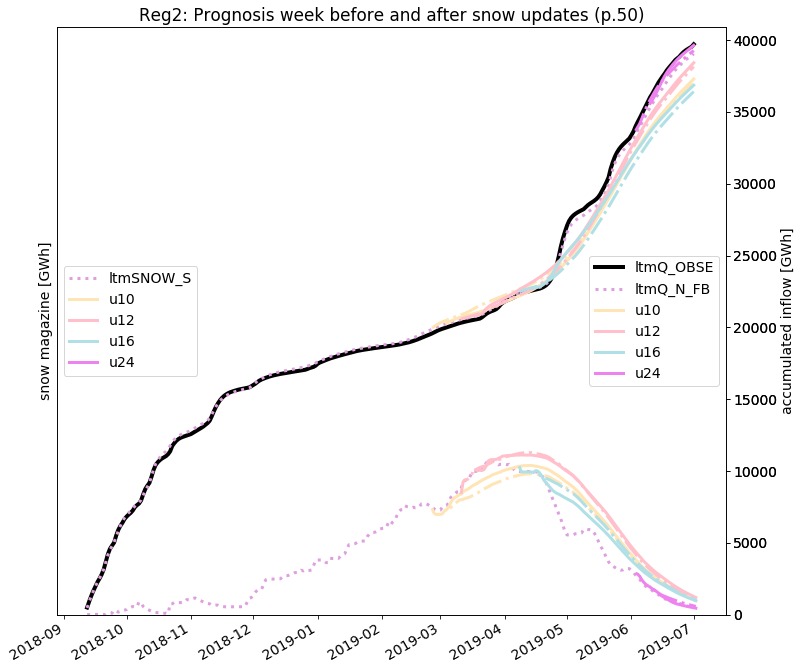

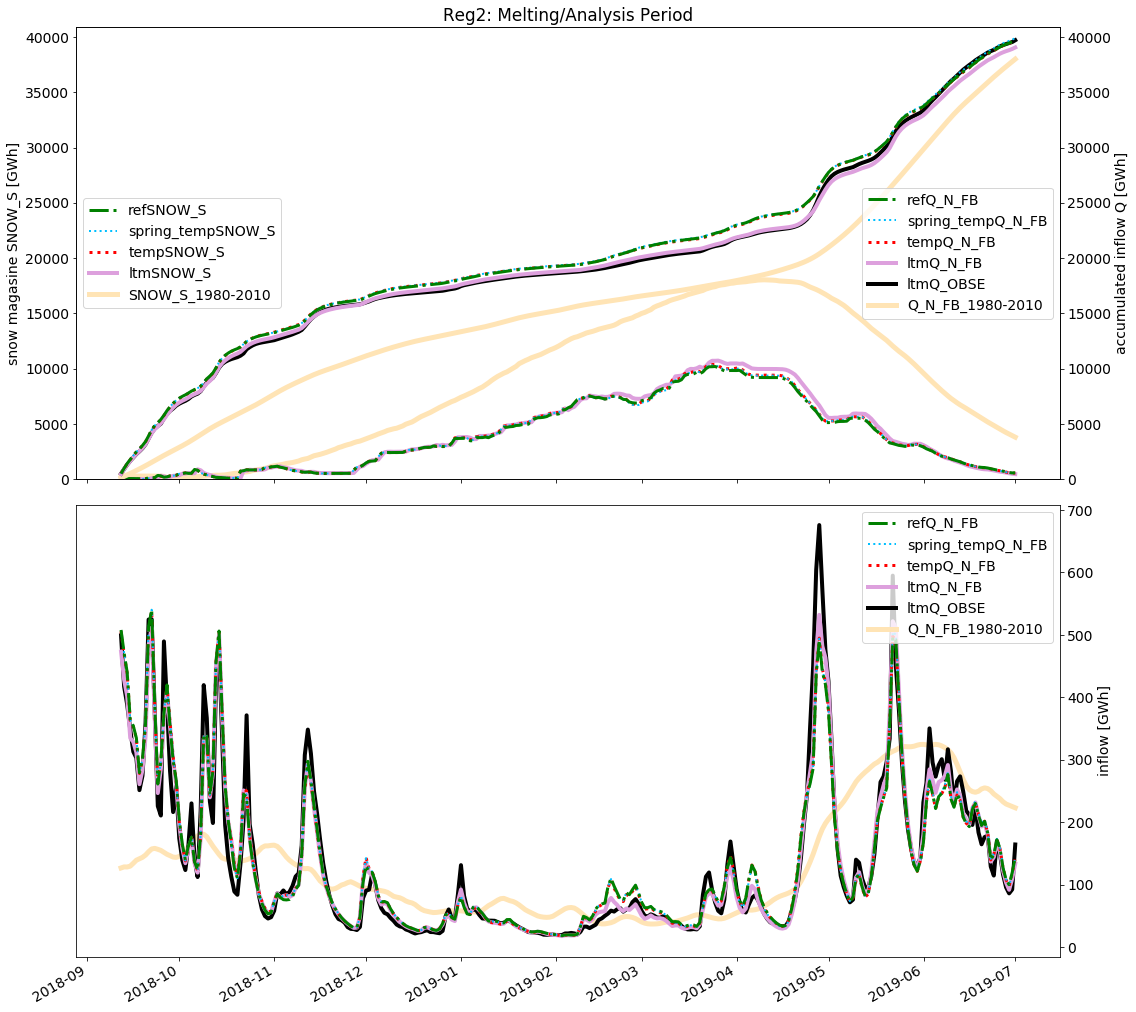

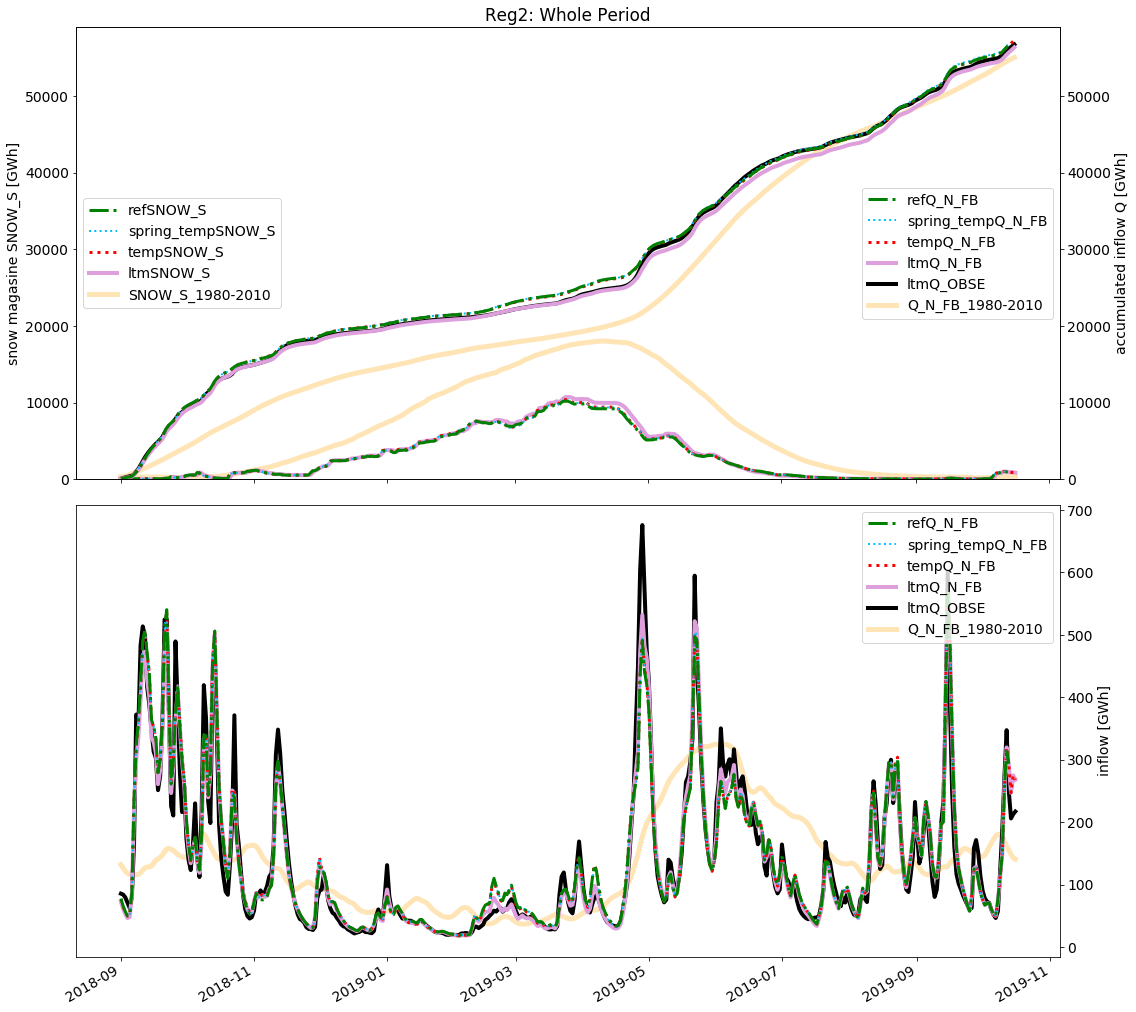




------------------------------------------------------------------------------------------------------------------------
                                                        Reg3
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-02-01): read from excel.
Analysis end (2019-08-03): First day when the inflow models are close to Q_OBSE, one week after the snow magasine goes under 20 GWh SWE.

Models updated in explicit weeek:
u10: ['Josteda-076.003', 'Leirdøl-076.030']

Accumulated performance [percentage deviation]: ref: -5.93, spring_temp: -5.41, temp: -5.43, ltm: -5.39
Profile correlation performance [R2 value]: ref: 0.88, spring_temp: 0.89, temp: 0.89, ltm: 0.91


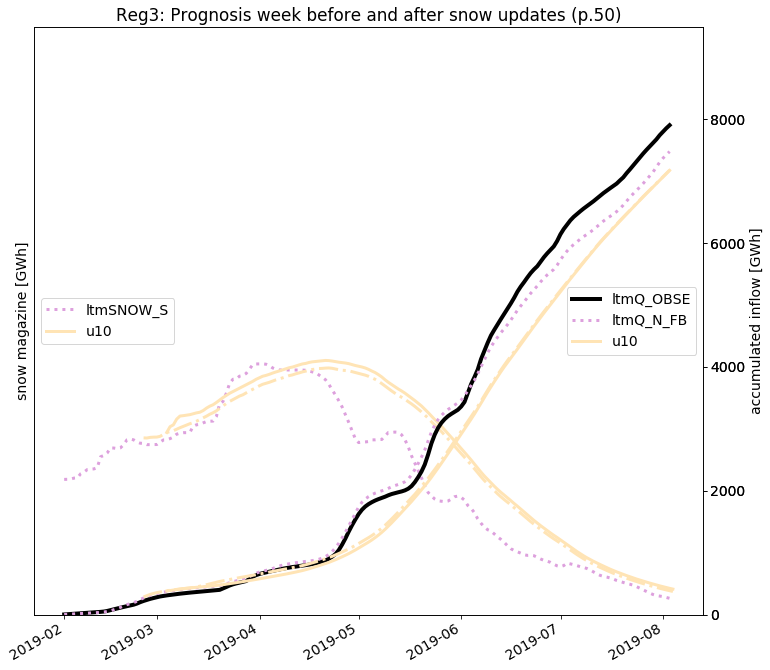

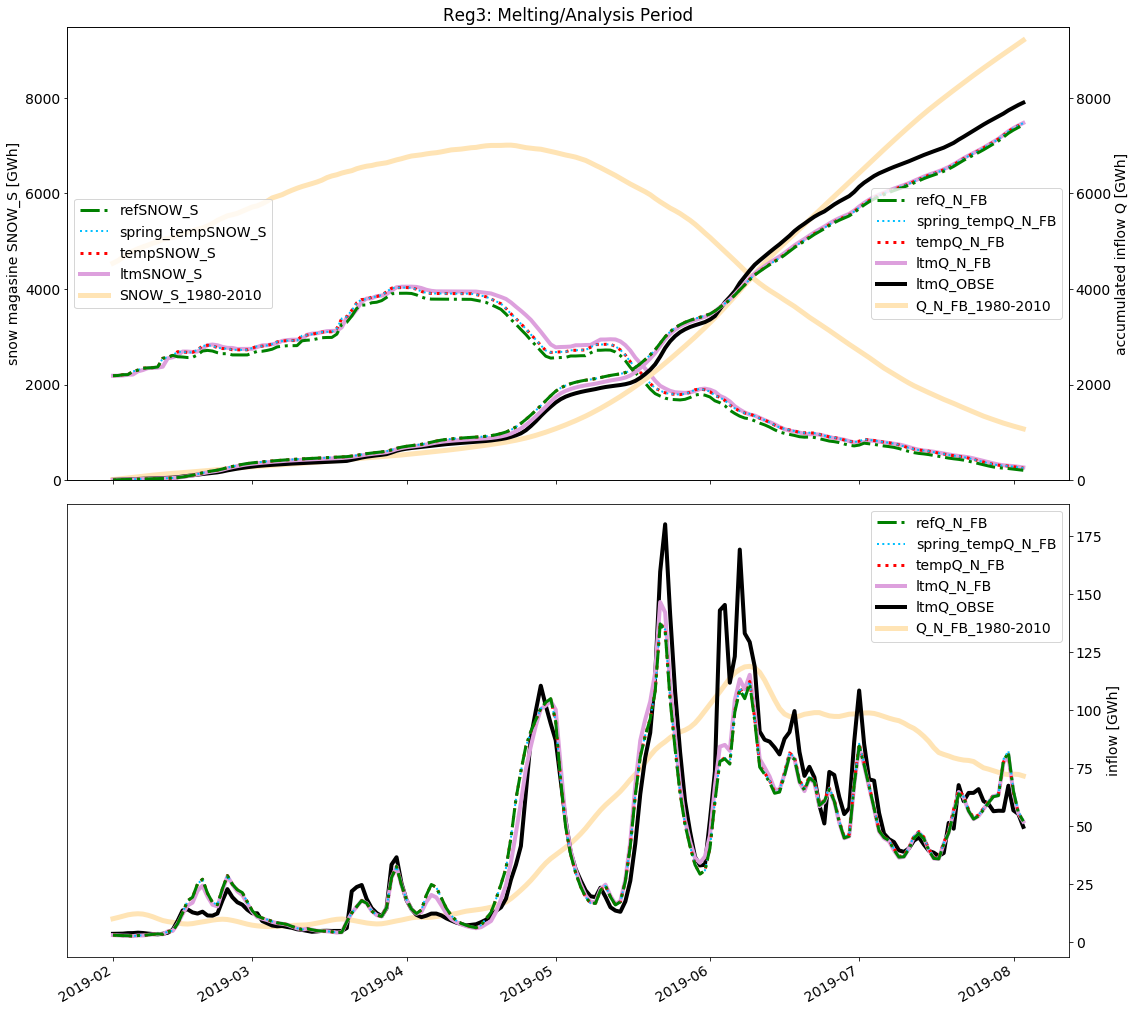

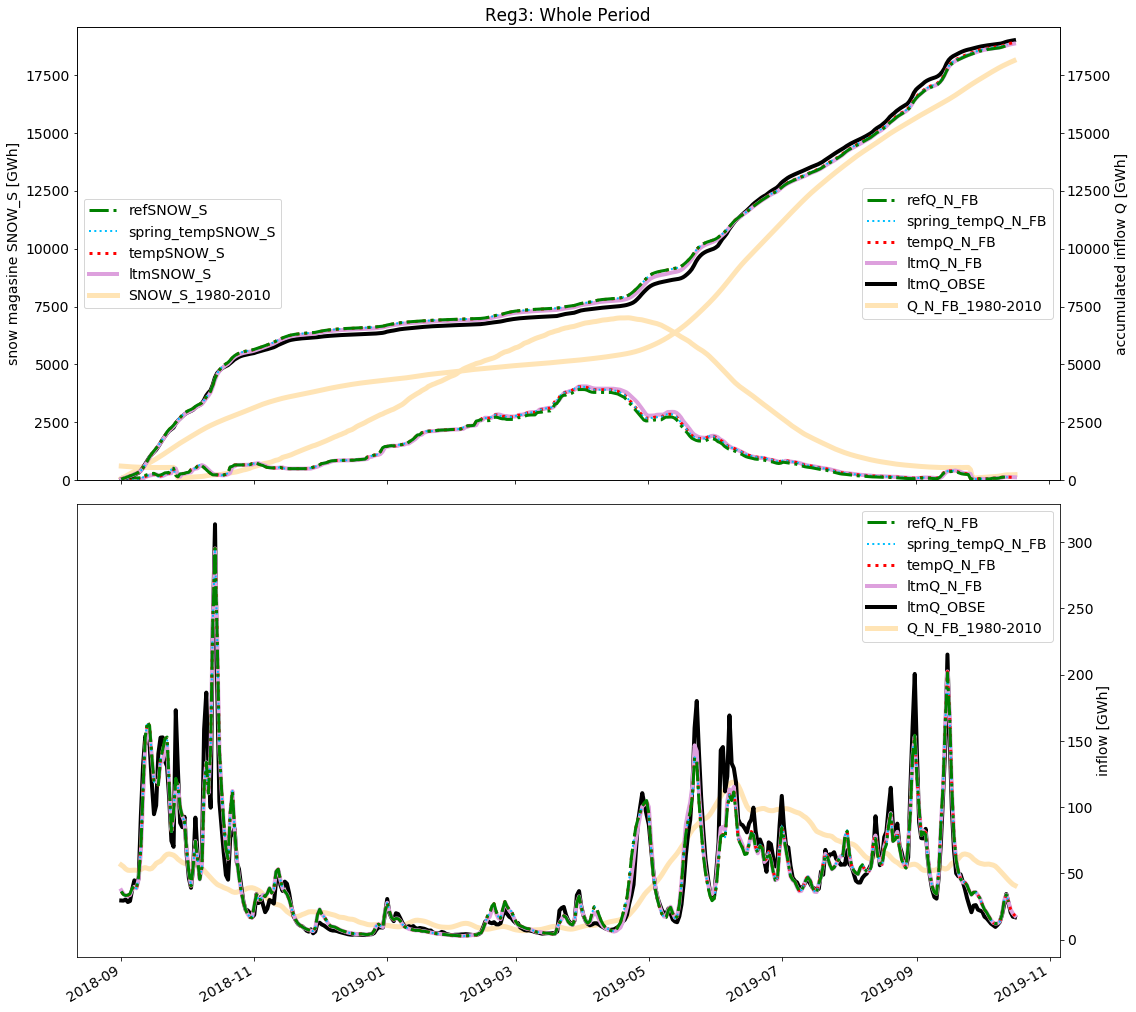




------------------------------------------------------------------------------------------------------------------------
                                                        Reg4
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-02-01): read from excel.
Analysis end (2019-07-13): First day when the inflow models are close to Q_OBSE, one week after the snow magasine goes under 20 GWh SWE.

Models updated in explicit weeek:
u09: ['Aurland.1']
u12: ['BrekkeB-072.005', 'Langsim-050.051', 'Sysima-050.015']
u24: ['Etna-012.007']
u25: ['Nore.1-015.011', 'Storesk-012.215']
u26: ['Grunke-012.197']

Accumulated performance [percentage deviation]: ref: -2.30, spring_temp: 1.83, temp: -2.84, ltm: -1.17
Profile correlation performance [R2 value]: ref: 0.92, spring_temp: 0.93, temp: 0.94, ltm: 0.96


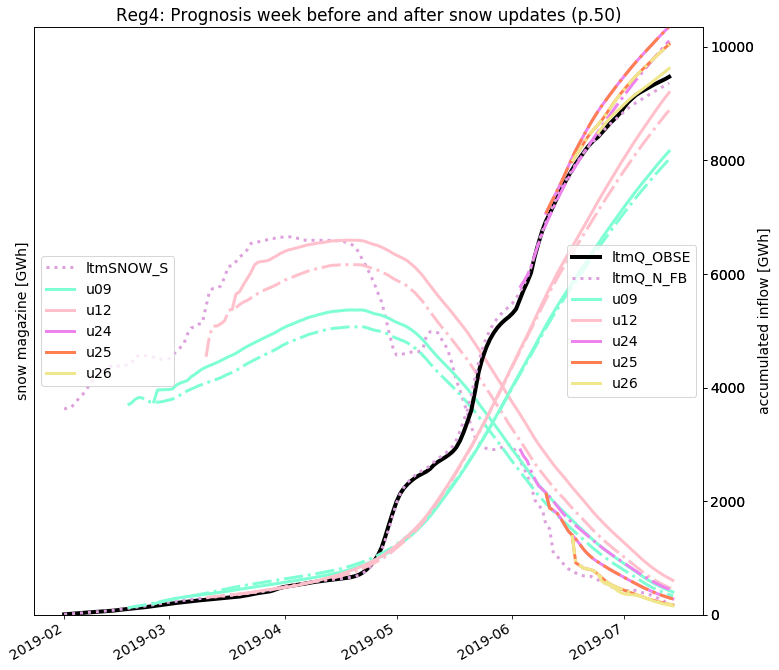

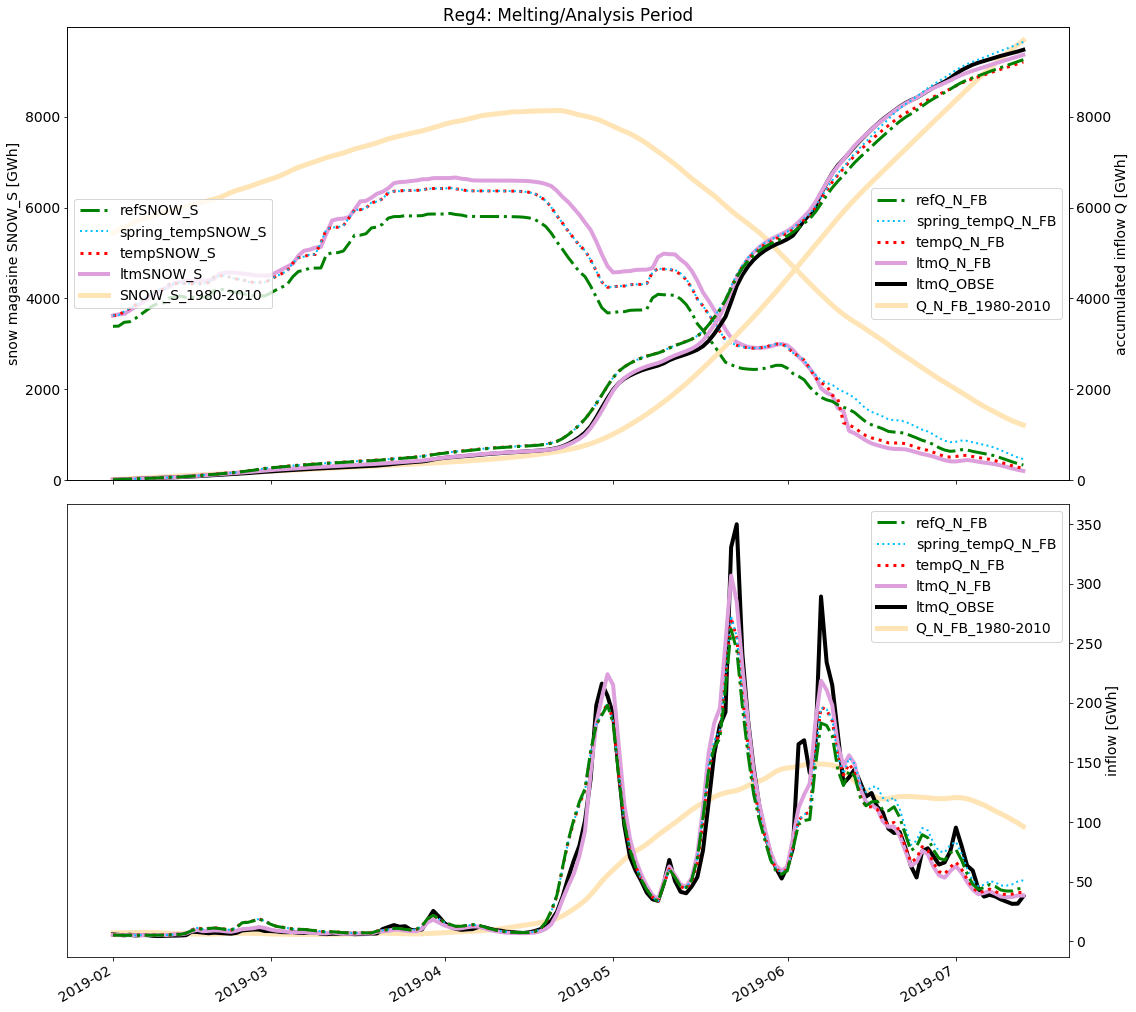

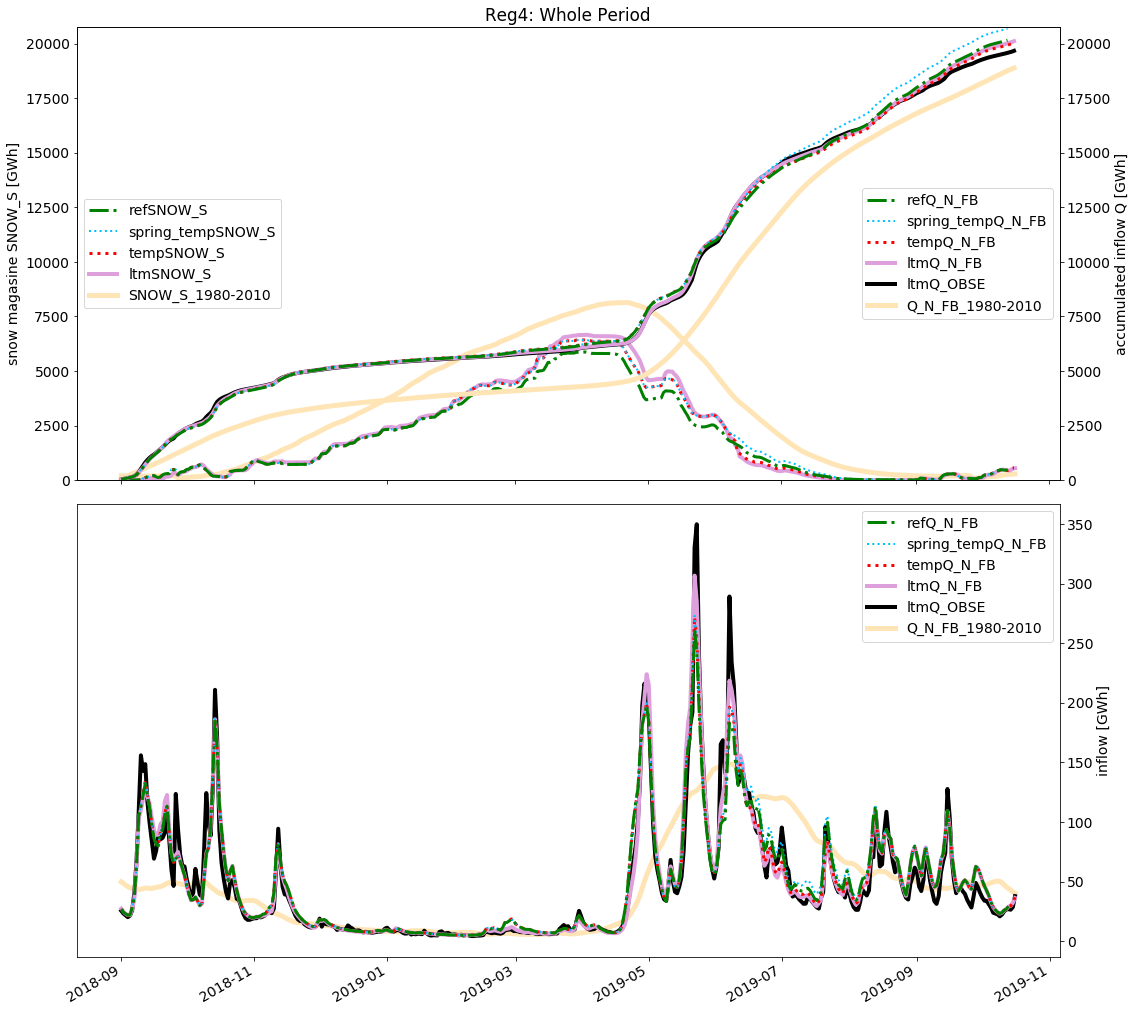




------------------------------------------------------------------------------------------------------------------------
                                                        Reg5
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-02-10): Day befor spring snow adjustment.
Analysis end (2019-07-17): First day when the inflow models are close to Q_OBSE, one week after the snow magasine goes under 20 GWh SWE.

Models updated in explicit weeek:
u12: ['Aura-109.033', 'Høy.K5A-079.014', 'Tya-123.999']
u24: ['Høggås-124.002']
u25: ['Gråsjø-112.014', 'Rinna-112.008', 'Trollhe-112.015']

Accumulated performance [percentage deviation]: ref: 4.61, spring_temp: 4.93, temp: 0.47, ltm: 0.47
Profile correlation performance [R2 value]: ref: 0.91, spring_temp: 0.91, temp: 0.91, ltm: 0.96


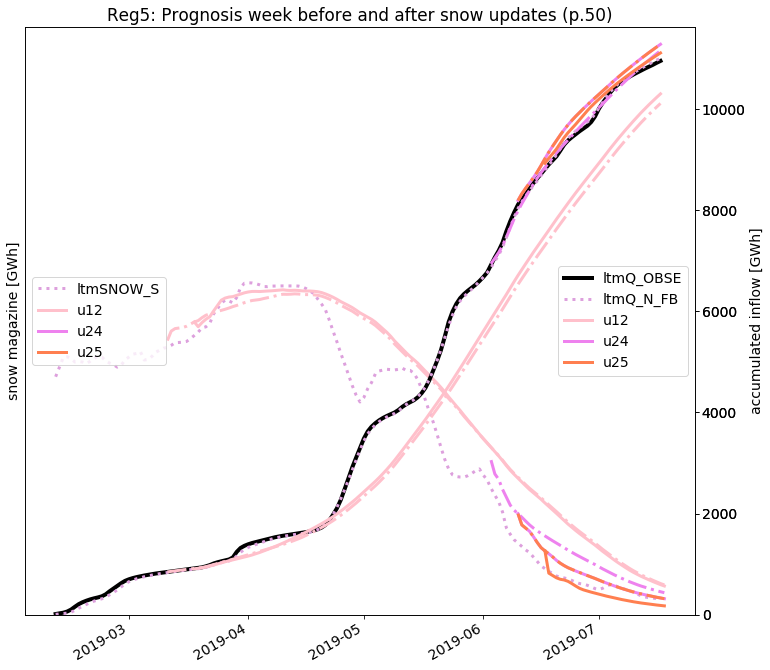

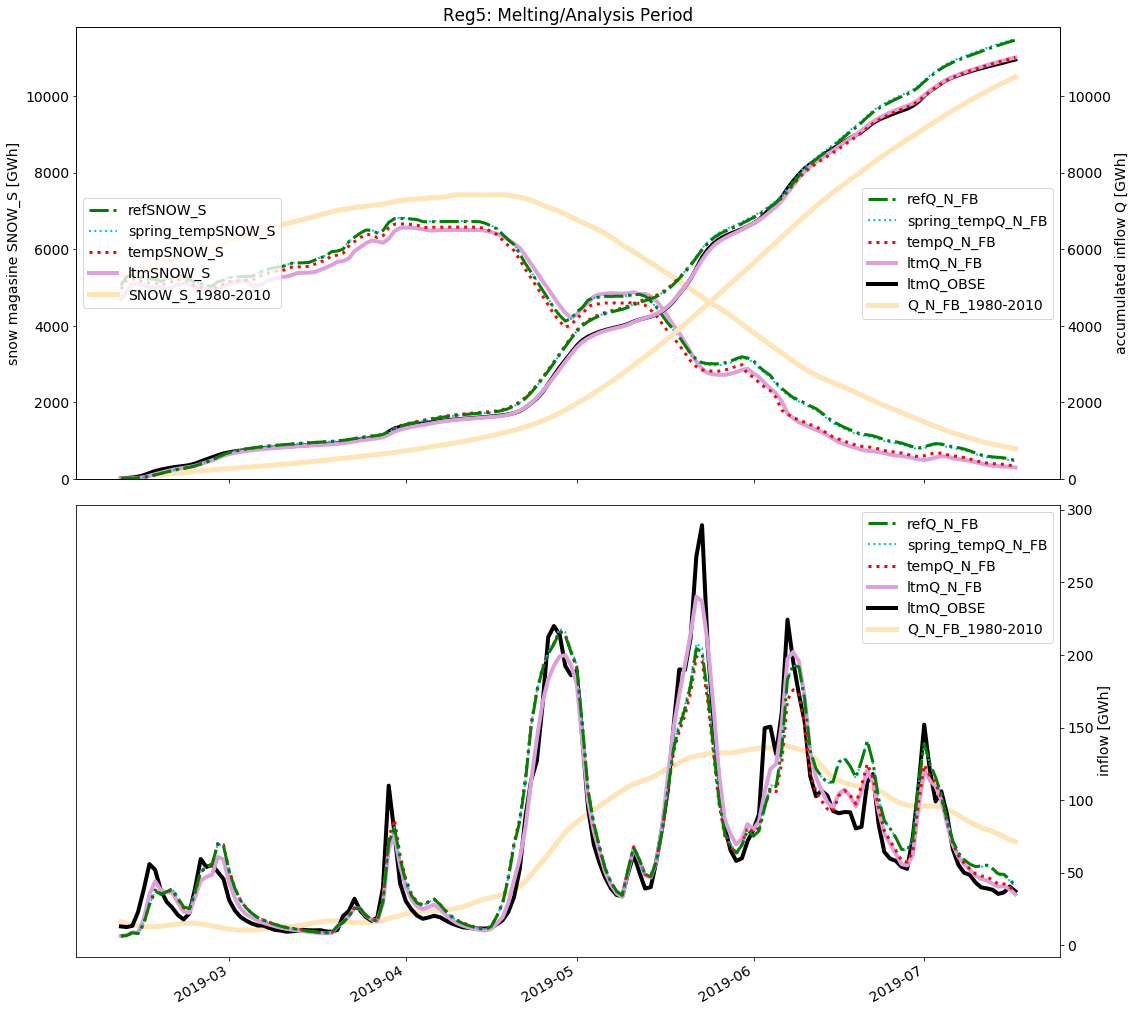

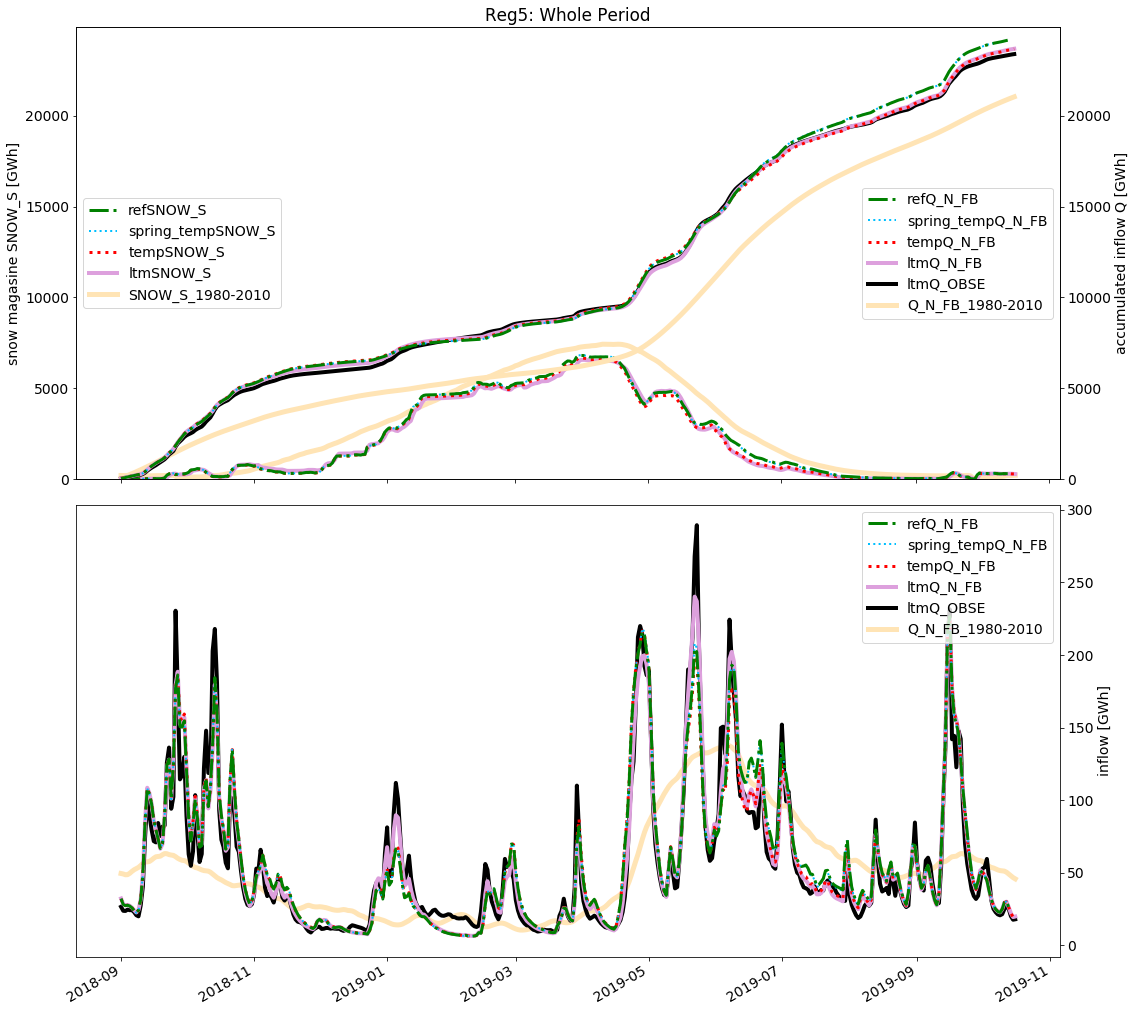




------------------------------------------------------------------------------------------------------------------------
                                                        Reg6
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-03-03): Day befor spring snow adjustment.
Analysis end (2019-08-30): First day when the inflow models are close to Q_OBSE, one week after the snow magasine goes under 20 GWh SWE.

Models updated in explicit weeek:
u12: ['LTM6-Kobbelv-167.034', 'LTM6-Svartis-159.014']
u16: ['LTM6-Røssvat-155.021']

Accumulated performance [percentage deviation]: ref: -4.16, spring_temp: -3.35, temp: -3.22, ltm: -1.21
Profile correlation performance [R2 value]: ref: 0.88, spring_temp: 0.88, temp: 0.88, ltm: 0.96


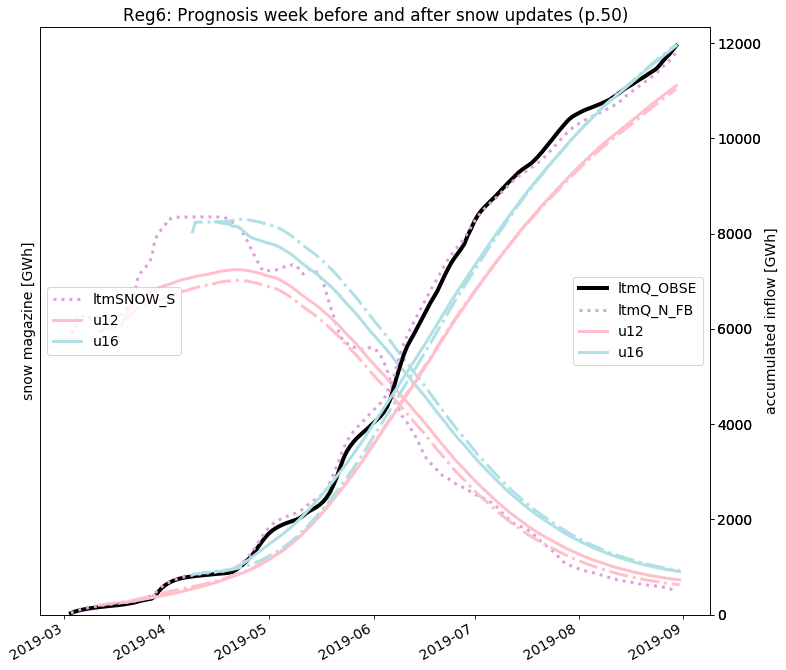

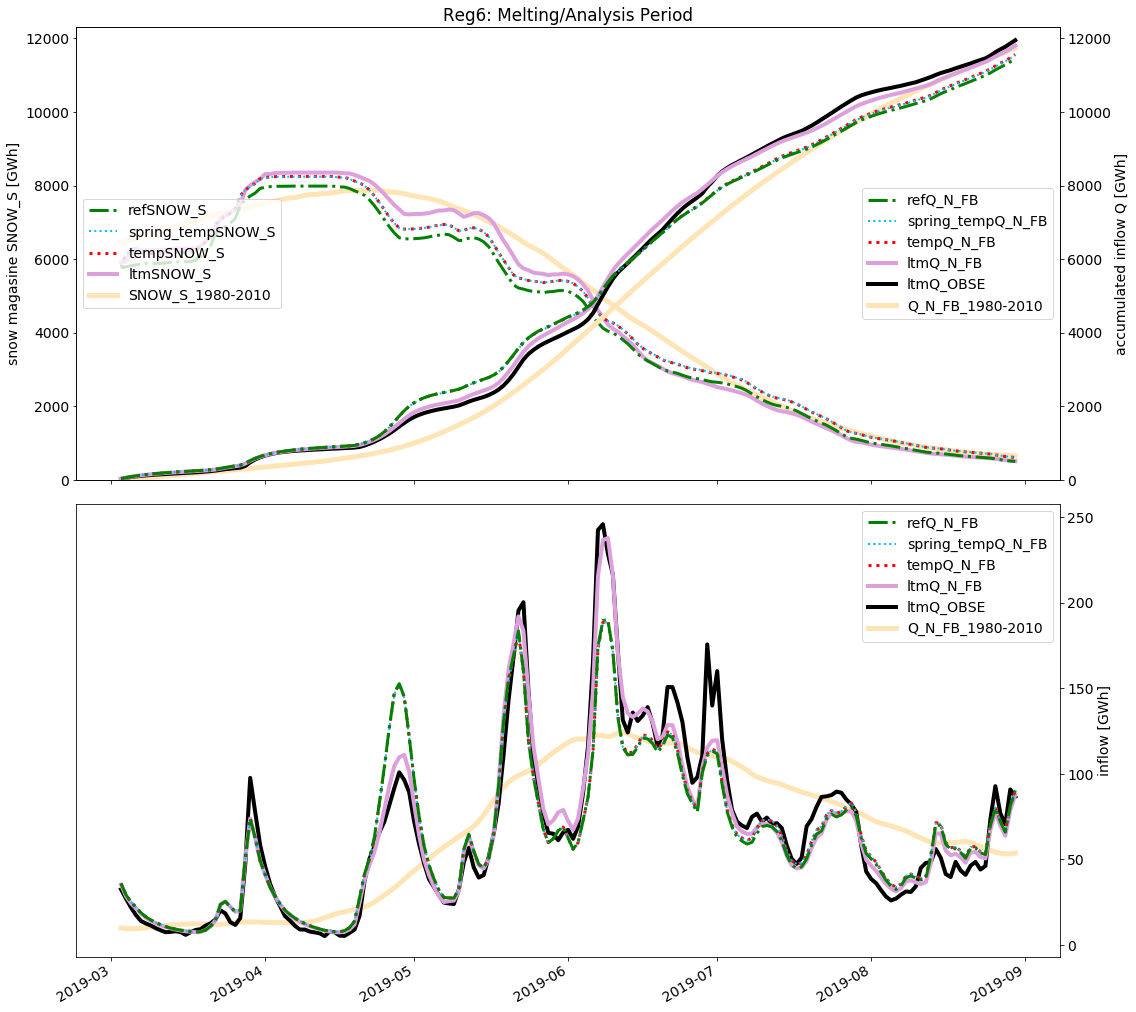

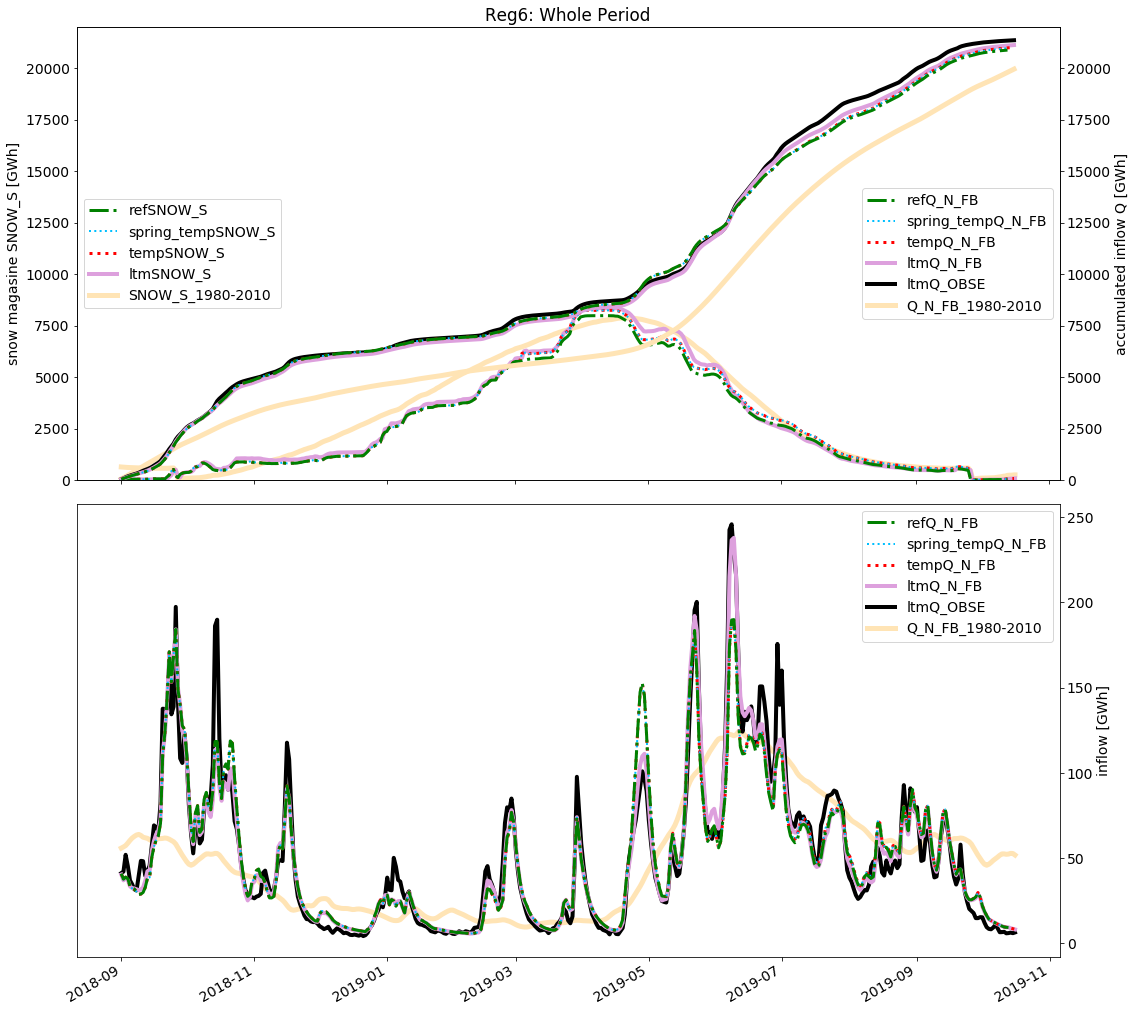




------------------------------------------------------------------------------------------------------------------------
                                                        Reg7
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-03-01): read from excel.
Analysis end (2019-08-07): First day when the inflow models are close to Q_OBSE, one week after the snow magasine goes under 20 GWh SWE.

Models updated in explicit weeek:
u12: ['Kobbelv-167.034']
u16: ['Båtsvat-173.011', 'Skjomen-173.001', 'SLangva-303.001']

Accumulated performance [percentage deviation]: ref: -6.59, spring_temp: -5.28, temp: -2.33, ltm: 0.51
Profile correlation performance [R2 value]: ref: 0.89, spring_temp: 0.89, temp: 0.90, ltm: 0.94


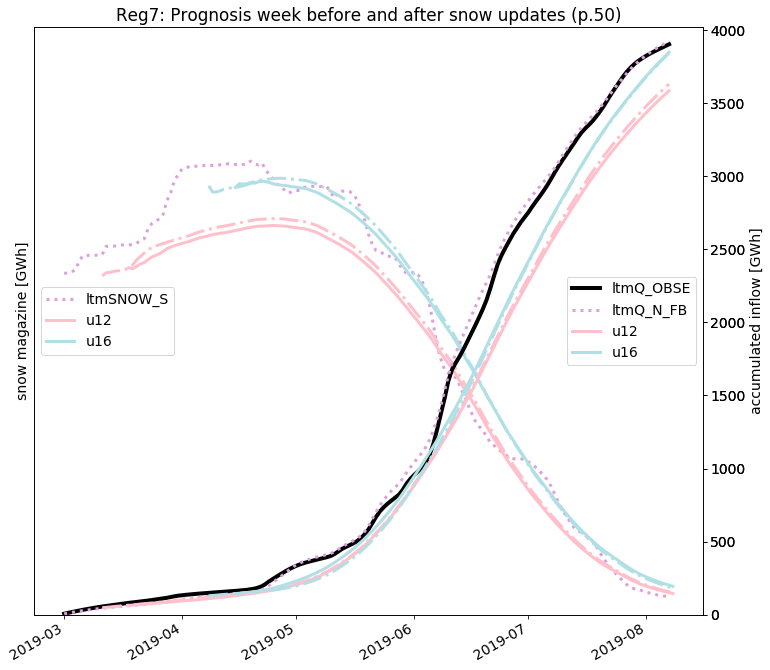

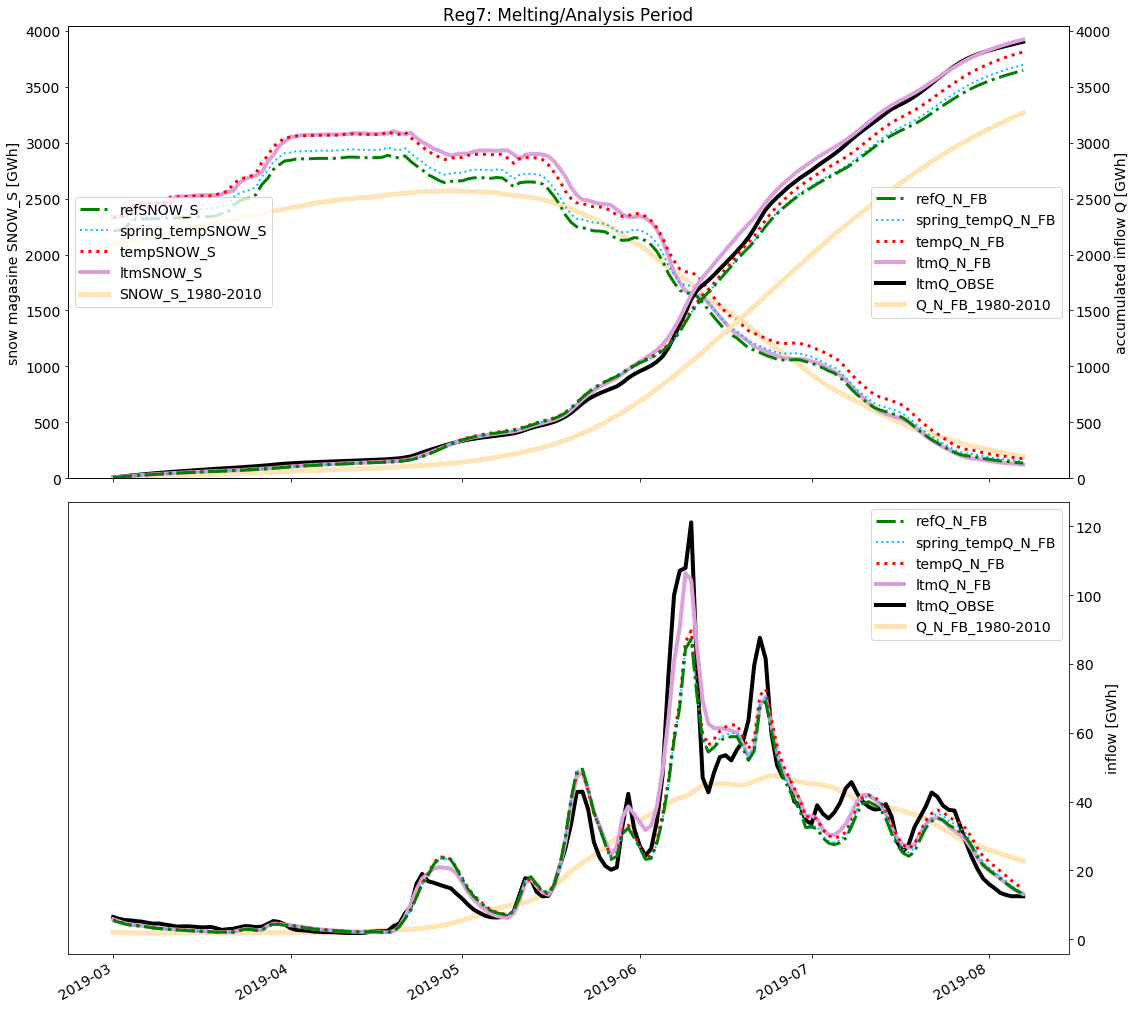

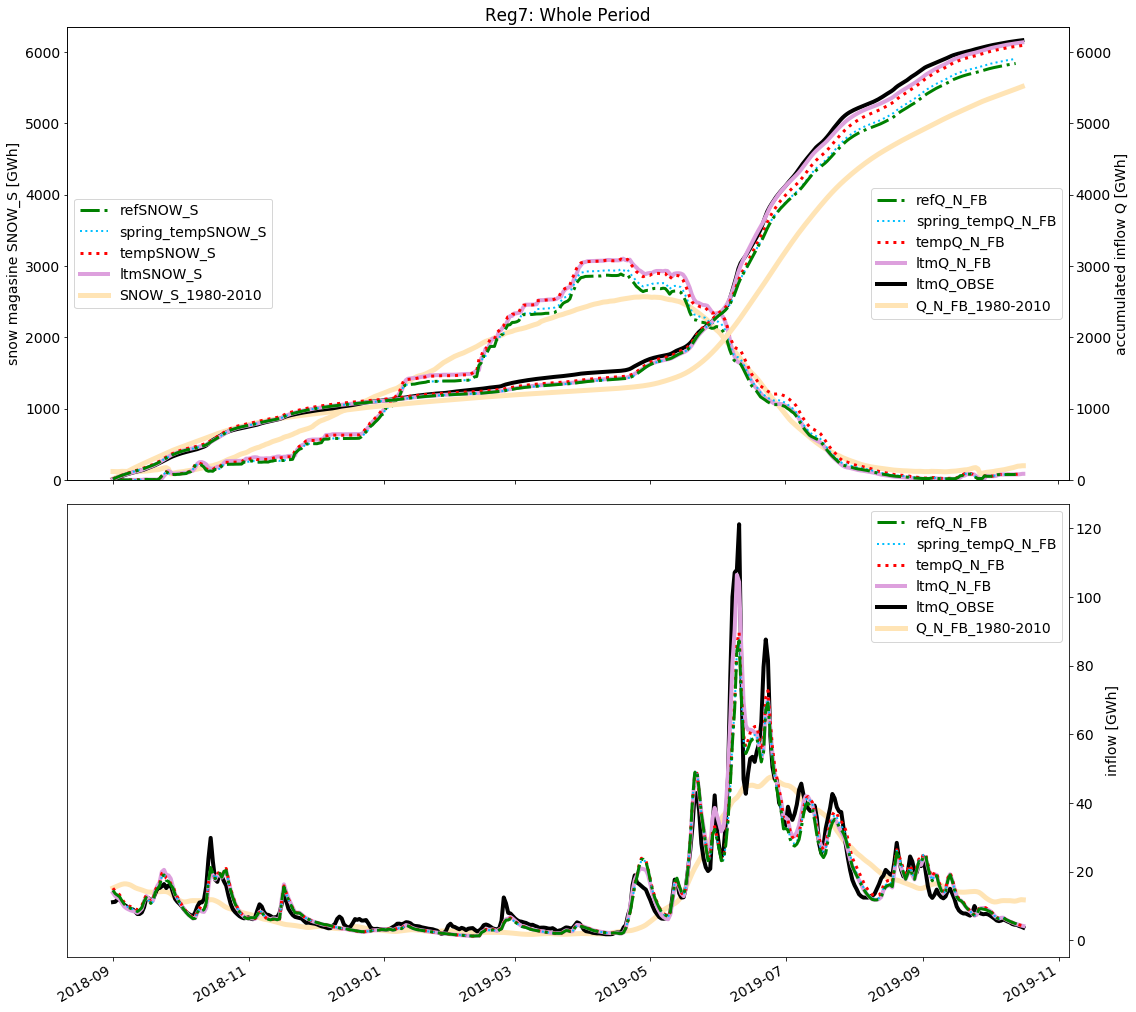




------------------------------------------------------------------------------------------------------------------------
                                                        Reg8
------------------------------------------------------------------------------------------------------------------------
Analysis start (2019-02-01): read from excel.
Analysis end (2019-07-10): First day when the inflow models are close to Q_OBSE, one week after the snow magasine goes under 20 GWh SWE.

Models updated in explicit weeek:
u10: ['Adamsel-229.006']

Accumulated performance [percentage deviation]: ref: 13.88, spring_temp: 12.88, temp: 7.99, ltm: 5.43
Profile correlation performance [R2 value]: ref: 0.86, spring_temp: 0.87, temp: 0.91, ltm: 0.93


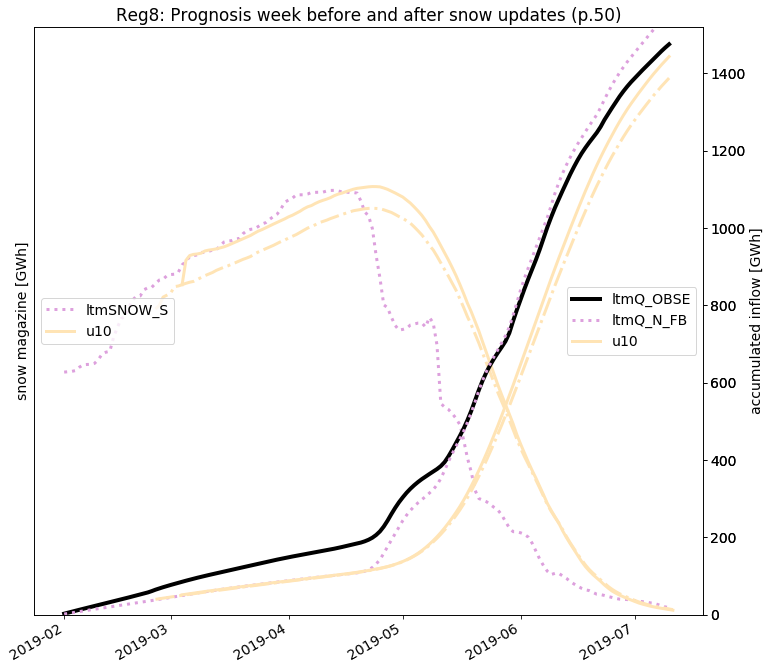

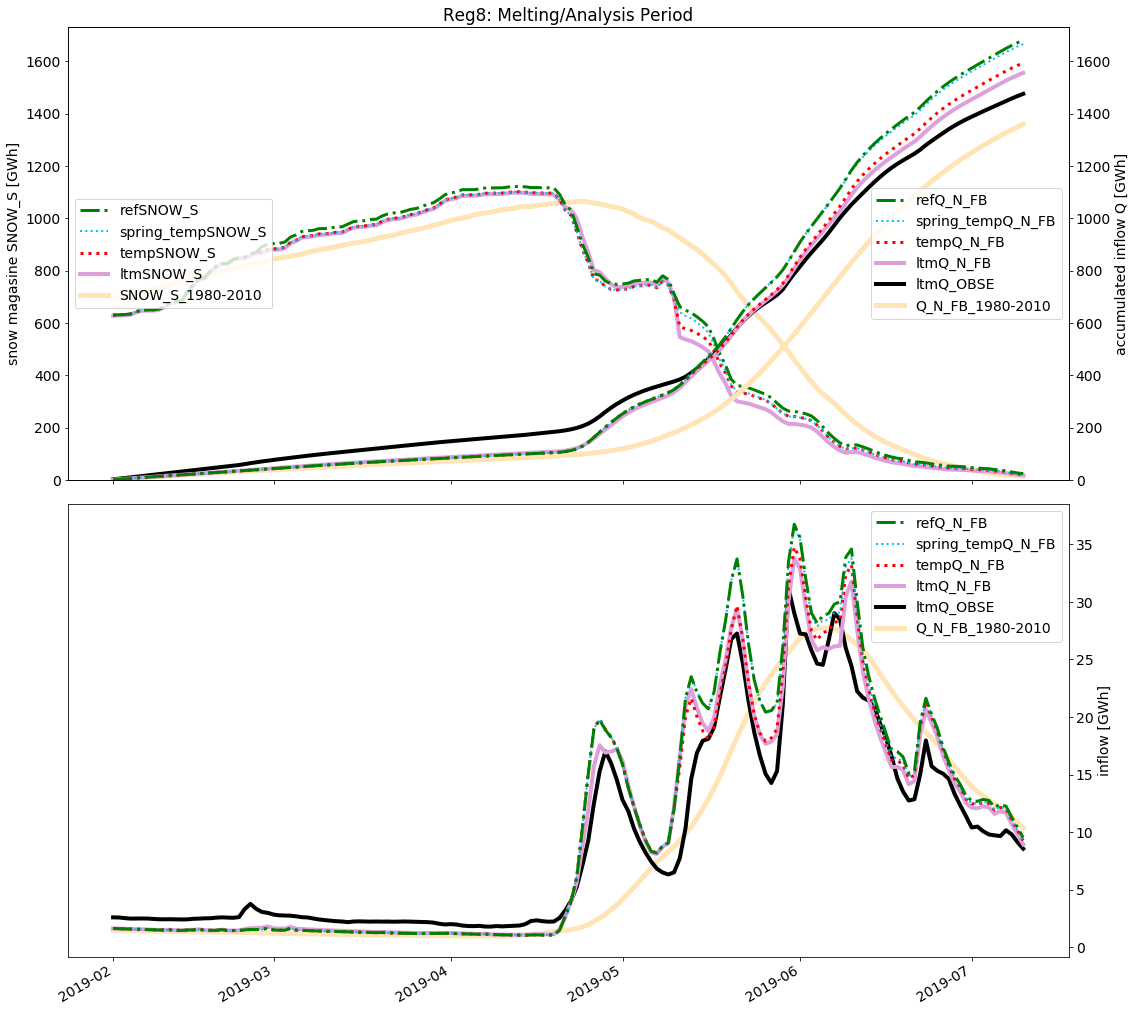

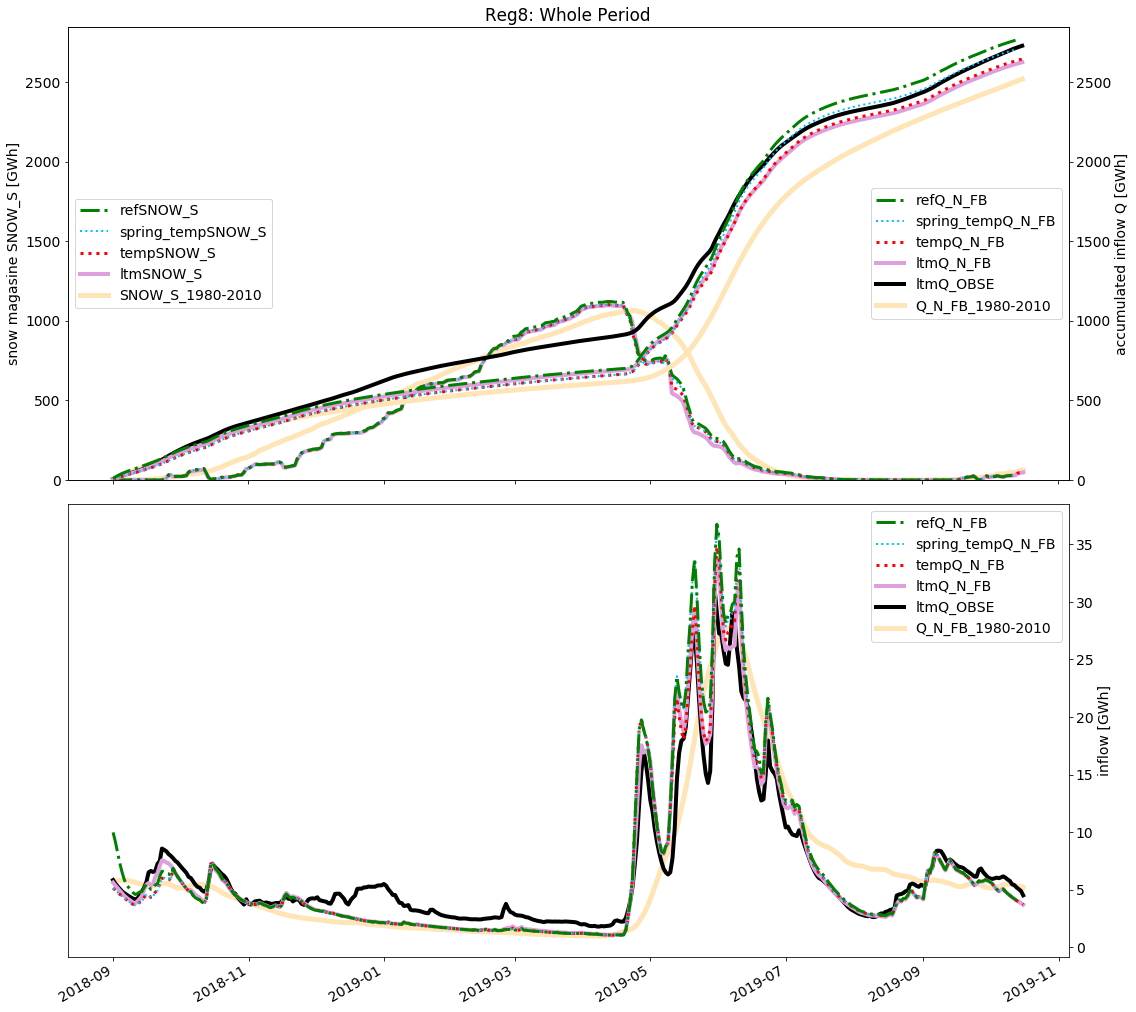

In [8]:
m.make_all(df_analysis_period, all_df, all_keys, start_info_list, end_info_list, sheet, vhhQ_OBSE_list, comments_list, excluded_list, file)